## Nike vs Adidas vs Reebok (shoes)
I'm looking for Adidas shoes. Are these Adidas shoes? Tell me.

## 1. Setups

In [35]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [36]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## 2. Search & Download Images

In [37]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [38]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
for q in ["adidas shoes", "nike shoes", "reebokshoes"]:
    downloader.download(q, limit=1000, output_dir='shoes', adult_filter_off=True, force_replace=False, timeout=5)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

[%] Downloading Image #525 from https://i.ytimg.com/vi/GZSDX61LnwU/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #526 from http://cdna.lystit.com/photos/2013/11/02/nike-black-gold-grey-pink-free-run-2-ext-running-shoe-product-1-14625169-442832619.jpeg
[%] File Downloaded !

[%] Downloading Image #527 from http://images.the-house.com/nike-renzo2-sh-blkwlfgry-totlorng-12-1.jpg
[%] File Downloaded !

[%] Downloading Image #528 from https://www.tennisnuts.com/images/product/full/NIKE-FREE-50-724383_002_A_PREM.jpg
[%] File Downloaded !

[%] Downloading Image #529 from https://www.dailyherald.com/storyimage/DA/20190119/BUSINESS/190118997/AR/0/AR-190118997.jpg&amp;updated=201901181034&amp;MaxW=900&amp;maxH=900&amp;noborder&amp;Q=80
[Error]Invalid image, not saving https://www.dailyherald.com/storyimage/DA/20190119/BUSINESS/190118997/AR/0/AR-190118997.jpg&amp;updated=201901181034&amp;MaxW=900&amp;maxH=900&amp;noborder&amp;Q=80

[!] Issue ge

## 3. Classification

In [39]:
shoes_types = 'adidas','nike','reebok'
path = Path('shoes')

In [40]:
if not path.exists():
    path.mkdir()
    for o in shoes_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} shoes')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [41]:
fns = get_image_files(path)
fns

(#3048) [Path('shoes/nike shoes/Image_264.jpeg'),Path('shoes/nike shoes/Image_427.jpg'),Path('shoes/nike shoes/Image_401.jpg'),Path('shoes/nike shoes/Image_618.jpg'),Path('shoes/nike shoes/Image_125.jpg'),Path('shoes/nike shoes/Image_882.jpg'),Path('shoes/nike shoes/Image_946.jpg'),Path('shoes/nike shoes/Image_302.jpg'),Path('shoes/nike shoes/Image_722.jpg'),Path('shoes/nike shoes/Image_890.jpg')...]

In [42]:
failed = verify_images(fns)
failed

(#0) []

In [43]:
failed.map(Path.unlink);

In [44]:
shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

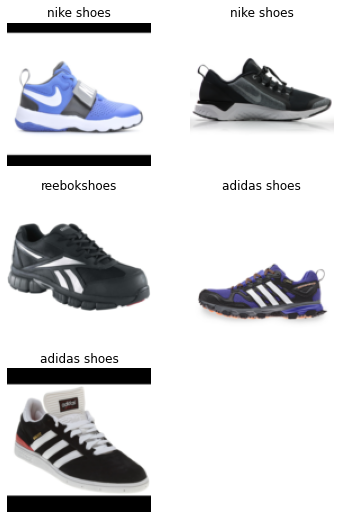

In [45]:
shoes = shoes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = shoes.dataloaders(path,bs=5)
dls.valid.show_batch(max_n=3000, nrows=3)

## 4. Train models

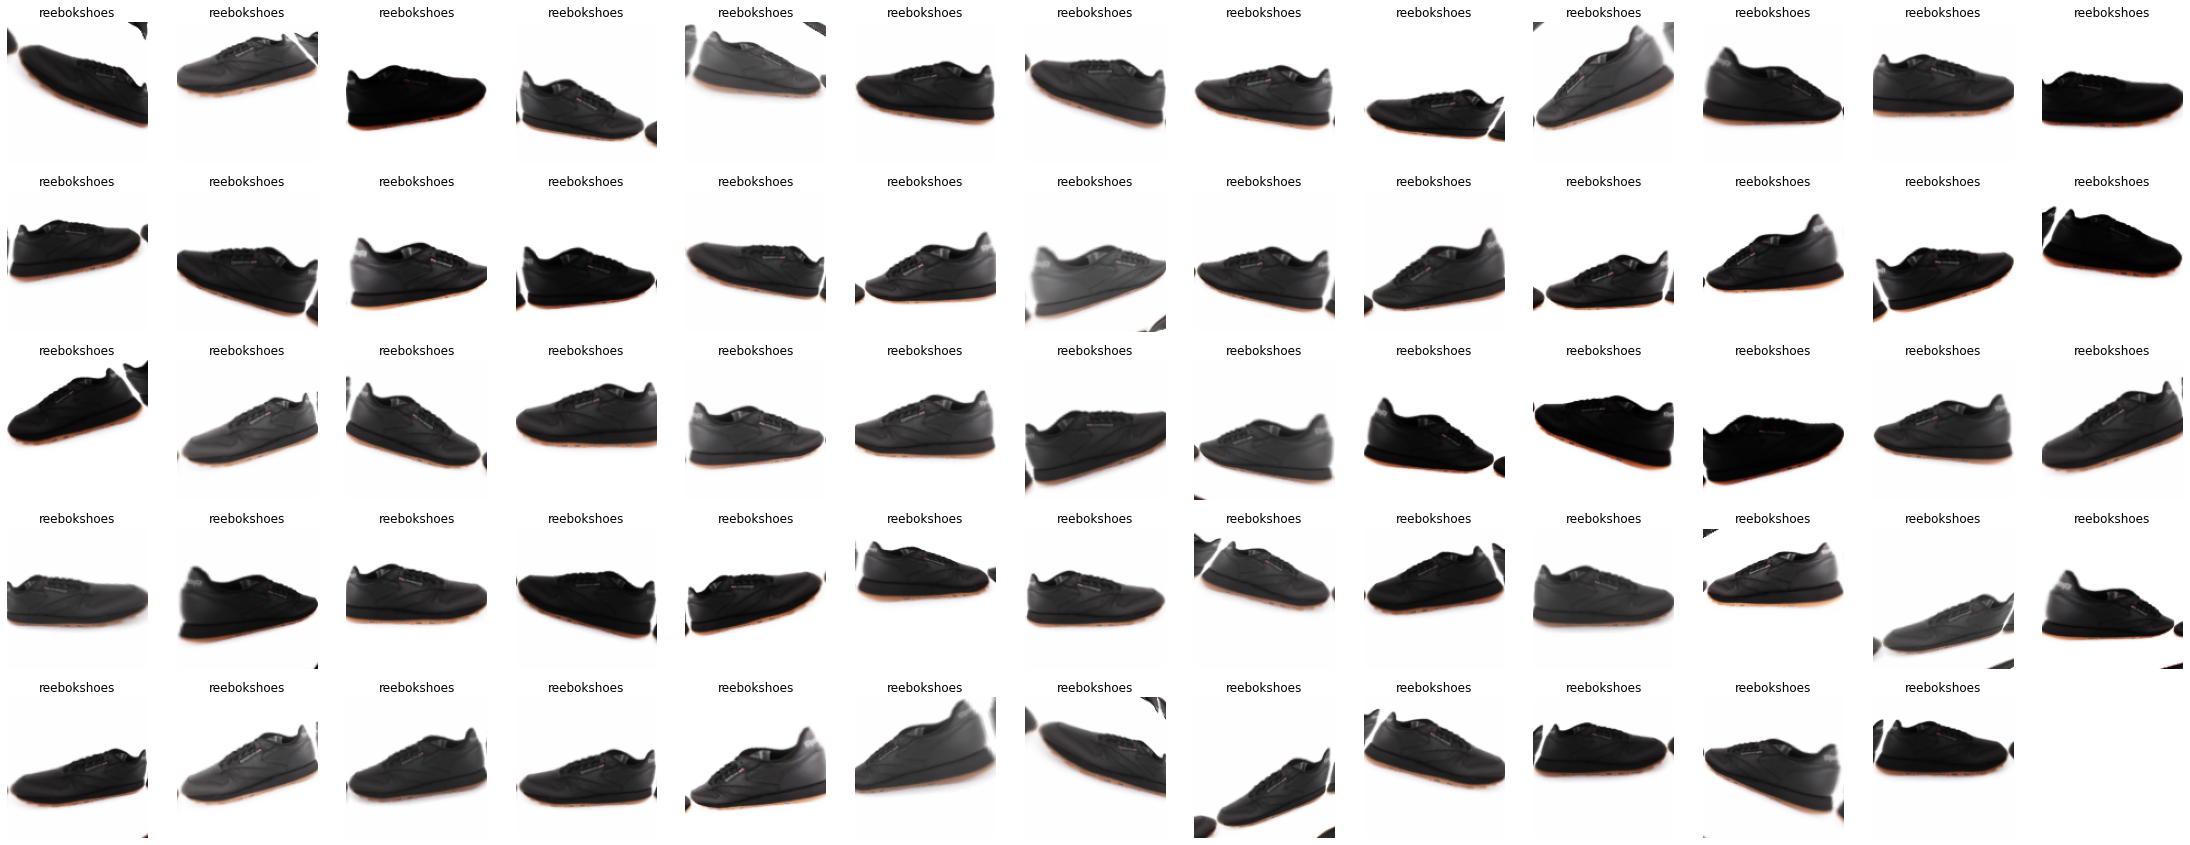

In [46]:
shoes = shoes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = shoes.dataloaders(path)
dls.train.show_batch(max_n=100, nrows=5, unique=True)

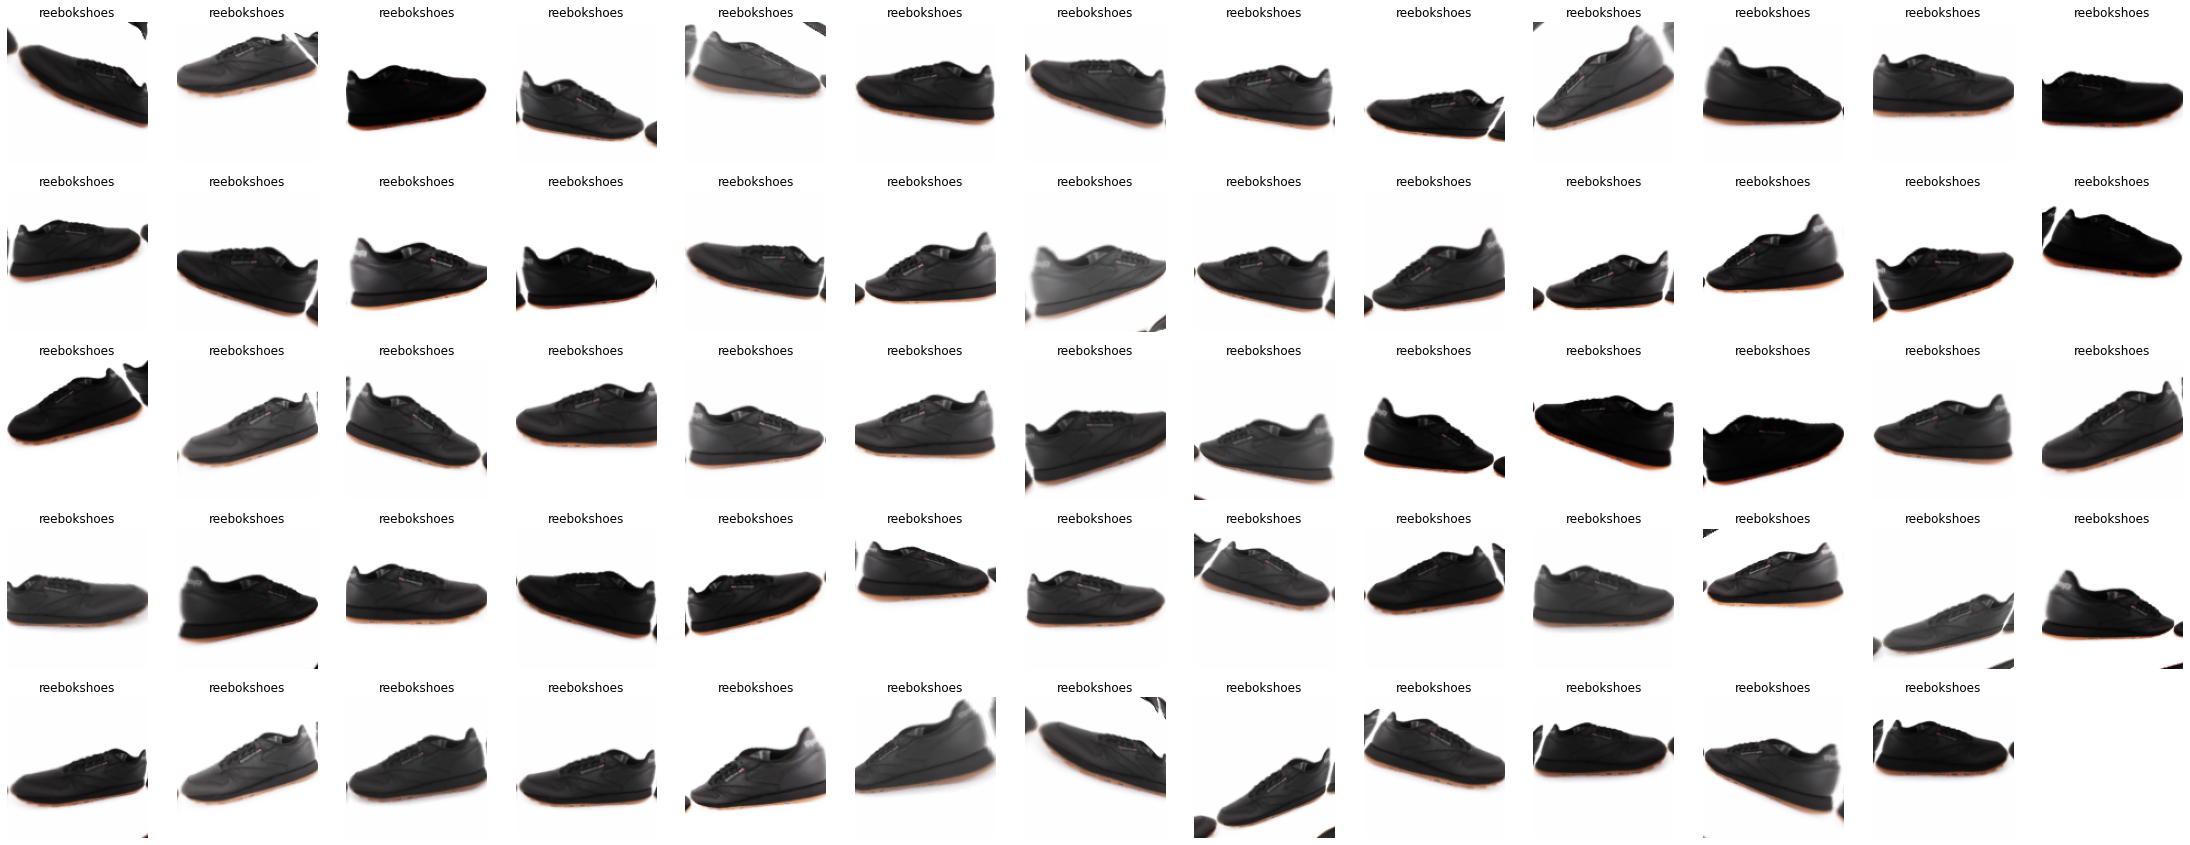

In [47]:
shoes = shoes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = shoes.dataloaders(path)
dls.train.show_batch(max_n=100, nrows=5, unique=True)

In [48]:
shoes = shoes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = shoes.dataloaders(path)

In [49]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,1.152085,0.428782,0.141215,01:55


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.477327,0.202734,0.065681,01:56
1,0.349163,0.126395,0.037767,01:56
2,0.243435,0.094787,0.024631,01:57
3,0.192814,0.070605,0.016420,01:57
4,0.145332,0.059288,0.009852,01:56
5,0.109077,0.052514,0.009852,01:56
6,0.081005,0.056168,0.011494,01:55
7,0.063272,0.054905,0.008210,01:53
8,0.046343,0.047370,0.009852,01:55
9,0.037209,0.059186,0.011494,01:53


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

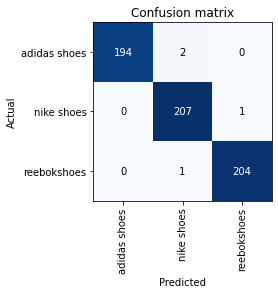

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## 5. 10 images with the highest loss in dataset 

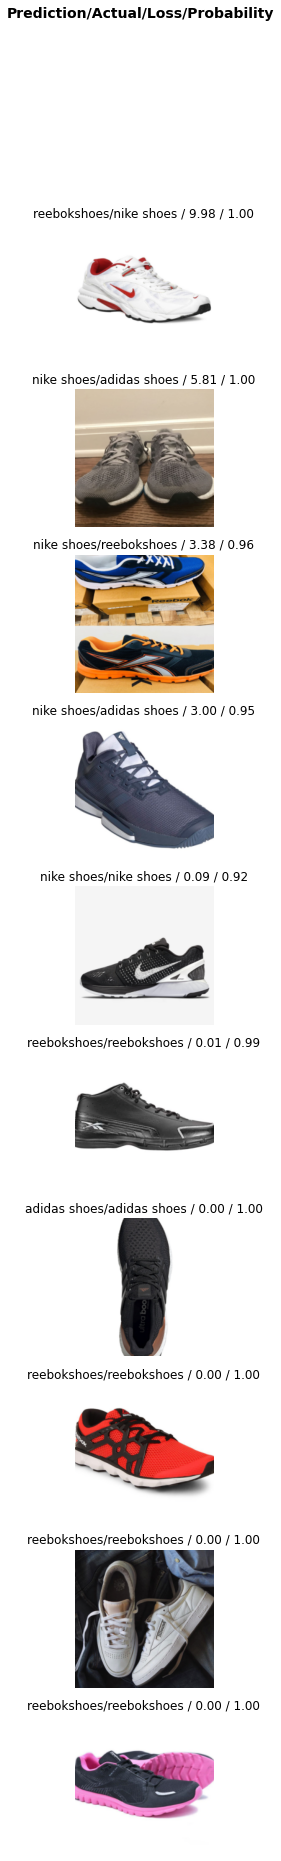

In [51]:
interp.plot_top_losses(10, nrows=10)

In [52]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [53]:
dls = shoes.dataloaders(path)

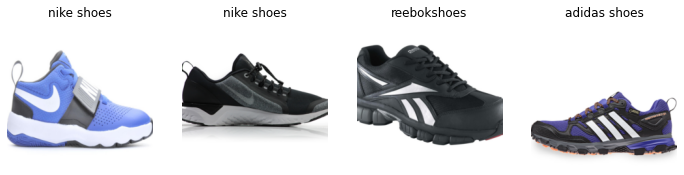

In [54]:
dls.valid.show_batch(max_n=4, nrows=1)

## 6. Get Predictions of Your Images

In [55]:
learn.export()

In [56]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [57]:
learn_inf = load_learner(path/'export.pkl')

In [58]:
learn_inf.predict('shoes.jpg')

('adidas shoes', tensor(0), tensor([9.6209e-01, 3.7914e-02, 8.7295e-08]))

In [59]:
learn_inf.dls.vocab

['adidas shoes', 'nike shoes', 'reebokshoes']

In [60]:
btn_upload = SimpleNamespace(data = ['shoes.jpg'])

In [61]:
img = PILImage.create(btn_upload.data[-1])

In [62]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [63]:
pred,pred_idx,probs = learn_inf.predict(img)

In [64]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: adidas shoes; Probability: 0.9621')

In [65]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [66]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [67]:
btn_upload = widgets.FileUpload()

In [68]:
VBox([widgets.Label('Select your shoes!'), 
      btn_upload, btn_run, out_pl, lbl_pred])